In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


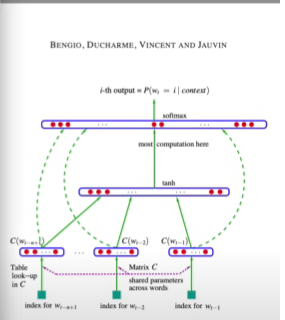

In [2]:
#read in all the words
words = open('/content/drive/MyDrive/dataSet_for_practice/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [28]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], [] #X = input (context),Y=target(labels (next characters))

for w in words:
  #print(w)

  context = [0] * block_size #context=[0, 0, 0]initializes with three padding characters('.' represented as 0).
  for ch in w + '.': # Iterate through each character + add '.' at the end
    ix = stoi[ch]
    X.append(context) #context (previous 3 characters) to X
    Y.append(ix) #ix(current character) to Y.
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # # Crop first element, append the new character

X = torch.tensor(X)
Y = torch.tensor(Y)


In [29]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [30]:
# build the dataset with (traning split, dev/validation split,  testing split)

def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [7]:
c = torch.randn((27, 2)) #lookup table

In [8]:
c[5]

tensor([ 0.0173, -2.1540])

In [9]:
#c[5] and both are same
#F.one_hot(torch.tensor(5),num_classes=27).float() @ c

In [10]:
emb = c[X]
emb.shape


torch.Size([32, 3, 2])

In [11]:
#hidden layer

W1 = torch.randn((6, 100)) #2 dimension embedding and 3 of them thats why number of input 6
b1 = torch.randn(100)

In [12]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #b1 its broadcasting

In [13]:
h.shape

torch.Size([32, 100])

In [14]:
h #-1 to 1

tensor([[-0.9984,  0.6908,  0.3509,  ...,  0.9993, -0.3222, -0.9071],
        [ 0.9835,  0.9782, -0.8835,  ...,  0.7605,  0.9722, -0.9938],
        [-0.9613, -0.8782,  0.9618,  ..., -0.9811, -0.9997, -0.7883],
        ...,
        [ 0.1313,  0.9744, -0.8646,  ...,  0.9896,  0.9855, -0.9962],
        [-0.9433, -0.5640,  0.9655,  ..., -0.3226, -0.9870, -0.9889],
        [-0.9604, -0.1316,  0.8971,  ..., -0.6299, -0.9883,  0.9428]])

3 of them repesent same thing

`torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1)`



`torch.cat(torch.unbind(emb,1),1)`


`emb.view(32,6)`


`emb.view(1,6)`



In [15]:
#torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

In [16]:
#torch.cat(torch.unbind(emb,1),1).shape  #(less efficient)

In [17]:
#a = torch.arange(18)
#a

In [18]:
#a.shape

In [19]:
#a.view(3,2,3)

In [20]:
#emb.view(32,6)

In [21]:
#final layer

W2 = torch.randn(100,27)
b2 = torch.randn(27)

In [22]:
logits = h @ W2 + b2

In [23]:
logits.shape

torch.Size([32, 27])

In [24]:
counts = logits.exp()

In [25]:
prob = counts/counts.sum(1, keepdim = True)

In [26]:
prob.shape

torch.Size([32, 27])

In [27]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(19.5325)

In [ ]:
# ------------ now made respectable :) ---------------

In [31]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [32]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [33]:
sum(p.nelement() for p in parameters)# number of parameters in total

3481

Cross Entropy

1. **forward pass will be much more efficient**
2. **backward pass can be much more efficient**
3. **numerically well behaved**


* doing those operation is fairly inefficient because pytorch do this mathmatical operation

* cross entropy significantly more numerically well behaved

* in exp() if we pass very positive number(1000)=>inf, suddenly we run of range in out floating point number



In [34]:
for p in parameters:
  p.requires_grad = True

In [35]:
lre = torch.linspace(-3, 0, 1000) #stepping linerly between exp of this learning rate (0.001,1) first 2=>10**3
lrs = 10**lre

In [36]:
lri = []
lossi = []

for i in range(1000):

  #minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)# (32,100)
  logits = h @ W2 + b2
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Y[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())


2.8477675914764404


In [37]:
#plt.plot(lri, lossi)

In [38]:
#---------------------------------------------------
#>>>>>>>>>>>>>NEW STart<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [39]:
#traning split, dev/validation split,  testing split
#80%, 10%, 10%

In [58]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [59]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [60]:
sum(p.nelement() for p in parameters)# number of parameters in total

11897

In [61]:
for p in parameters:
  p.requires_grad = True

In [44]:
lre = torch.linspace(-3, 0, 1000) #stepping linerly between exp of this learning rate (0.001,1) first 2=>10**3
lrs = 10**lre

In [62]:
lri = []
lossi = []
stepi = []


In [63]:
for i in range(200000):

  #minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)# (32,100)
  logits = h @ W2 + b2
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

# print(loss.item())


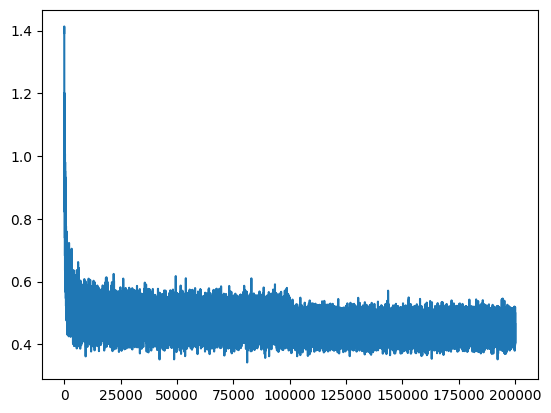

In [64]:
plt.plot(stepi, lossi)

In [48]:
+++++++++++print(loss.item())

2.8693113327026367


In [55]:
# traning loss
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)# (32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.8310, grad_fn=<NllLossBackward0>)

In [56]:
#evaluate the loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1)# (32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.8294, grad_fn=<NllLossBackward0>)

In [57]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.8346, grad_fn=<NllLossBackward0>)

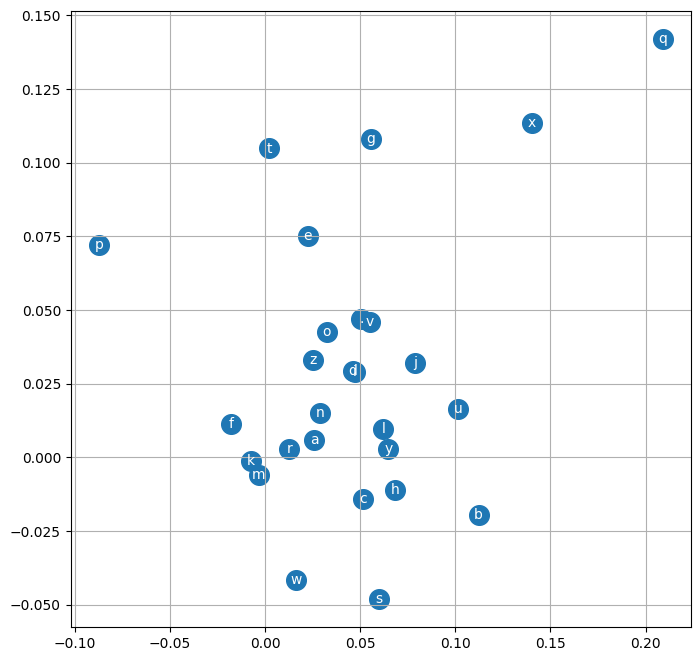

In [51]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
"""
larger hidden layer:-
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,27), generator=g)
b2 = torch.randn(27, generator=g)
------------------------------------------
-------------------------------------------

larger embedding:-
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator=g)
b2 = torch.randn(27, generator=g)

"""

In [52]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [54]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

ernaaimyazhreelmnd.
ryal.
retmrsjejdrlrg.
adejedieliihemy.
realeieiseananarnelyzimhlkaa.
n.
sadbvrglhiries.
.
n.
jr.
eelklxnteuofyu.
amnvdar.
ylruemehs.
laajaysknyaa.
hya.
nalyansun.
zajrlveuren.
.
rt.
nsveaoec.
